In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv('dataset_train.csv', index_col='Index')

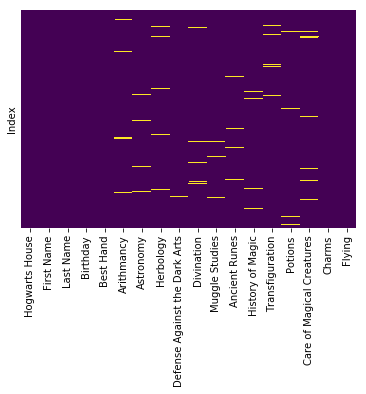

In [3]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4]:
sns.countplot(x='house_int', hue='year', data=model_df.numeric_df)

NameError: name 'model_df' is not defined

In [ ]:
df_train.describe()

# Describe class

In [ ]:
class Description:
    indexes = ['count',
#                'nan', 'Non nan',
               'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    
    def __init__(self, df: pd.DataFrame):
        self.dataframe = df.copy()
        self.numeric_df = self.dataframe._get_numeric_data()
        self.clean_df = self.numeric_df.dropna(how='any', inplace=False)
        self.numeric_features = list(self.numeric_df.columns)

    def describe(self) -> pd.DataFrame:
        descrtiption_df = pd.DataFrame(index=self.indexes, columns=self.numeric_features)
        # MAKE NAN as bonus
        descrtiption_df.loc['count', :] = self._count()
        descrtiption_df.loc['mean', :] = self._mean()
        descrtiption_df.loc['std', :] = self._std()
        descrtiption_df.loc['min', :] = self._min()
        descrtiption_df.loc['max', :] = self._max()
        return descrtiption_df
    
    @staticmethod
    def __filter_nan(df, feature) -> pd.Series:
        not_null_indexes = df[feature].notnull()
        filtered_series = df[feature][not_null_indexes]
        return filtered_series
        
    def _count(self):
        data = dict()
        for feature in self.numeric_features:
            not_null_values = self.numeric_df[feature].notnull()
            data[feature] = len(self.numeric_df[not_null_values])
#         data = {feature: len(self.numeric_df[self.numeric_df[feature].notnull()]) for feature in self.numeric_features}
        return pd.Series(data=data)
    
    def _mean(self):
        data = dict()
        for feature in self.numeric_features:
            filtered_series = self.__filter_nan(self.numeric_df, feature)
            data[feature] = filtered_series.sum() / len(filtered_series)
        return pd.Series(data=data)

    @staticmethod
    def __count_std(values: np.ndarray, mean):
        std = (np.sum((values - mean) ** 2) / len(values)) ** 0.5
        return std
    
    @staticmethod
    def __count__min_max(values: np.ndarray) -> tuple:
        values = values.copy()
        values.sort()
        _min, *_, _max = values
        return _min, _max

    def _std(self):
        mean_series = self._mean()
        data = dict()
        for feature in self.numeric_features:
            filtered_series = self.__filter_nan(self.numeric_df, feature)
            data[feature] = self.__count_std(filtered_series.values, mean_series[feature])
        return pd.Series(data=data)
    
    # TODO: Make _min, _max in one method
    def _min(self):
        data = dict()
        for feature in self.numeric_features:
            filtered_series = self.__filter_nan(self.numeric_df, feature)
            data[feature], _ = self.__count__min_max(filtered_series.values)
        return pd.Series(data=data)
    
    def _max(self):
        data = dict()
        for feature in self.numeric_features:
            filtered_series = self.__filter_nan(self.numeric_df, feature)
            _, data[feature] = self.__count__min_max(filtered_series.values)
        return pd.Series(data=data)

In [ ]:
description = Description(df_train)
description.describe()

In [ ]:
df_train['year'] = df_train['Birthday'].apply(lambda x: int(x.split('-')[0]))
df_train['year'] = df_train['year'] - df_train['year'].min()
df_train.head()

In [ ]:
houses = df_train['Hogwarts House'].unique().tolist()
def classify_house(house_name):
    return houses.index(house_name)

hands = df_train['Best Hand'].unique().tolist()
def classify_hand(hand_name):
    return hands.index(hand_name)

In [ ]:
plt.scatter(df_train['Astronomy'], df_train['Defense Against the Dark Arts'])
plt.xlabel('Astronomy')
plt.ylabel('Defense Against the Dark Arts')
plt.show()

# Create scatter (pair plot) plot

In [ ]:
df_train['house_int'] = df_train['Hogwarts House'].apply(classify_house)
df_train['hand_int'] = df_train['Best Hand'].apply(classify_hand)
plot_df = df_train._get_numeric_data().dropna(how='any', inplace=False)


colors_dict = {0: 'blue', 1: 'red', 2: 'purple', 3: 'green'}
colors = plot_df['house_int'].map(lambda x: colors_dict.get(x))
pd.plotting.scatter_matrix(plot_df, figsize=(40,40), color=colors)

### Looking to the scatter plot above we can make next decissions:
    1. Astronomy and Defence Against the Dark Arts have strong correlation. So we have to use only one of this features.
    2. Arithmacy and Care of Magical Creatures don't infuence on separating students between houses. So we don't need to use this features in our model.
    3. I'm not very confident about indluence of "Hand" feature. Try to build model with this feature and without it.

In [ ]:
def plot_cource_distribution(df):
    fig, axes = plt.subplots()
    years = df['year'].unique()
    for year in years:
        one_year_df = df[df['year'] == year]
        plt.bar(one_year_df['Hogwarts House'], one_year_df['First Name'])
        plt.title('Course-' + str(year))
        plt.xlabel('Houses')
        plt.ylabel('Students')
        plt.show()

In [ ]:
plot_cource_distribution(cources_df)

# Linear regression part

In [6]:
class FrameHandler:
    
    @classmethod
    def cut_features(cls, df: pd.DataFrame, features=[]) -> pd.DataFrame:
        return df.drop(columns=features, inplace=False)
    
    @classmethod
    def normalize_data(cls, df: pd.DataFrame, columns=[]) -> pd.DataFrame:
        normalized_df = df.copy()    
        if columns:
            normalized_df[columns] = cls.__normalize(normalized_df[columns])
        else:
            normalized_df = cls.normalize(__normalized_df)
        return normalized_df
    
    @classmethod
    def __normalize(df):
        return (df - df.min()) / (df.max() - df.min())
    
    

In [ ]:
class LogisticRegression:
    
    
    # Right -> Right=1 hand is the best, otherwise Right=0
    def __init__(self, dataframe):
        self.initial_df = dataframe.copy()
        self.houses = dataframe['Hogwarts House'].unique().tolist()
#         self.hands = df_train['Best Hand'].unique().tolist()
        
        right_hand = pd.get_dummies(dataframe['Best Hand'], drop_first=True)
        self.initial_df = pd.concat([self.initial_df, right_hand], axis=1)
        
        self.numeric_df = self.initial_df._get_numeric_data()
        self.numeric_df['year'] = df_train['Birthday'].apply(lambda x: int(x.split('-')[0]))
        self.numeric_df['year'] = self.numeric_df['year'] - self.numeric_df['year'].min()
        self.numeric_df['house_int'] = df_train['Hogwarts House'].apply(self._classify_house)
        
        # We should drop na values in rows
        self.numeric_df.dropna(how='any', inplace=True)
        
        
    def _classify_house(self, house_name):
        return self.houses.index(house_name)

    
    @staticmethod
    def sigmoid(z):
        # hθ(x)=g(θTx)
        # g(z)=1 / (1 + e−z)
        return 1 / (1 + np.exp(-z))
    
#     def gradient_step(self, learning_rate: float, loss: np.ndarray, rows: int, X: np.ndarray) -> np.ndarray:
#         s = X.T.dot(loss)
#         delta_W = 2 * (learning_rate * s / rows)
#         return self.W - delta_W
    
    def cost_gradient(theta, X, y):
        predictions = self.sigmoid(X @ theta)
        return X.T @ (predictions - y) / len(y)
    
    def cost(self, theta, X, y):
        predictions = self.sigmoid(X @ theta)
        predictions[predictions == 1] = 0.999
        error = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)
        return sum(error) / len(y)
    
    @staticmethod
    def gradient_algorithm(cost: callable, initial_theta, cost_gradient, X, y):
        """
        Minimize a function using a gradient algorithm.
        return: Vector of result weights for the model 
        """
        # TODO: Gradient algorithm should be implemented
        pass
    

In [ ]:
from sklearn.linear_model import LogisticRegression

df_ = df_train.dropna(how='any', inplace=False)
model = LogisticRegression()
model.fit(df_.drop(columns='Defense Against the Dark Arts')._get_numeric_data(), df_['house_int'])


In [ ]:
model.score(df_.drop(columns='Defense Against the Dark Arts')._get_numeric_data(), df_['house_int'])